# Proprocessing

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("cleaned_data.csv")

In [105]:
df.head(3)

,id,name,content,date,cut_content,postag_content,keyword,len_of_keyword,top3,vec
0,9070017,สวยที่สุดในสามโลก,คลั่งรักแฟนตัวเองมากค่ะร๊ากนะ\n อยู่เป็นเมียข่...,2021-01-25 09:41:28,คลั่งรัก แฟน ตัว เอง มาก ค่ะ ร๊าก นะ\n อยู่ ...,"[(คลั่งรัก, VERB), (แฟน, VERB), (ตัว, NOUN), (...","[ตัว, เมีย, คลั่งรัก, แฟน, ข่อย]",5,"[ตัว, แฟน, เมีย]","[0.13184032837549844, -0.06934999922911327, 0...."
1,9070001,แม่หนึ่ง,ขอให้แม่สุขภาพแข็งและรํ่ารวยเงินทอง,2021-01-25 08:31:28,ขอ ให้ แม่ สุขภาพ แข็ง และ รํ่า รวย เงินทอง,"[(ขอ, VERB), (ให้, VERB), (แม่, NOUN), (สุขภาพ...","[แม่, สุขภาพ, รํ่า, รวย, เงินทอง]",5,"[สุขภาพ, เงินทอง, รวย]","[0.03567966570456823, 0.07496966421604156, 0.0..."
2,9069993,เบบี๋,ขอให้ข้าพเจ้าคะแนนดีๆมีแต่สิ่งดีๆเข้ามาในชีวิต...,2021-01-25 08:13:10,ขอ ให้ ข้าพเจ้า คะแนน ดี ๆ มี แต่ สิ่ง ดี ๆ เข...,"[(ขอ, VERB), (ให้, VERB), (ข้าพเจ้า, NOUN), (ค...","[คะแนน, ชีวิต, แฟน]",3,"[ชีวิต, แฟน, คะแนน]","[-0.03599533438682556, -0.027704333265622456, ..."


In [4]:
df['postag_content'] = df.postag_content.apply(lambda x: eval(x))

In [5]:
from pythainlp.corpus.common import thai_stopwords as stopwords
non_alpha = set(list("!@#$%^&*()_+<>?,./-ๆ๑๒๓๔๕๖๗๘๙"))
set(list("0123456789"))
def getImportantWord(L,postag):
    out = []
    for p in postag:
        for c in L:
            if(c[1] == p and (c[0].strip() not in stopwords()) and (c[0] not in non_alpha) and (c[0] not in set(list("0123456789")))):
                out.append(c[0])
    if len(out) ==0:
        return np.nan
    return out


In [6]:
df['keyword'] = df.postag_content.apply(lambda x: getImportantWord(x,['NOUN','VERB']))
df = df.dropna()
df.head()

,id,name,content,date,cut_content,postag_content,keyword
0,9070017,สวยที่สุดในสามโลก,คลั่งรักแฟนตัวเองมากค่ะร๊ากนะ\n อยู่เป็นเมียข่...,2021-01-25 09:41:28,คลั่งรัก แฟน ตัว เอง มาก ค่ะ ร๊าก นะ\n อยู่ ...,"[(คลั่งรัก, VERB), (แฟน, VERB), (ตัว, NOUN), (...","[ตัว, เมีย, คลั่งรัก, แฟน, ข่อย]"
1,9070001,แม่หนึ่ง,ขอให้แม่สุขภาพแข็งและรํ่ารวยเงินทอง,2021-01-25 08:31:28,ขอ ให้ แม่ สุขภาพ แข็ง และ รํ่า รวย เงินทอง,"[(ขอ, VERB), (ให้, VERB), (แม่, NOUN), (สุขภาพ...","[แม่, สุขภาพ, รํ่า, รวย, เงินทอง]"
2,9069993,เบบี๋,ขอให้ข้าพเจ้าคะแนนดีๆมีแต่สิ่งดีๆเข้ามาในชีวิต...,2021-01-25 08:13:10,ขอ ให้ ข้าพเจ้า คะแนน ดี ๆ มี แต่ สิ่ง ดี ๆ เข...,"[(ขอ, VERB), (ให้, VERB), (ข้าพเจ้า, NOUN), (ค...","[คะแนน, ชีวิต, แฟน]"
4,9069969,น้องใบตอง,สนุกสนานลอยกระทงเอย,2021-01-24 22:00:58,สนุกสนาน ลอยกระทงเอย,"[(สนุกสนาน, NOUN), (ลอยกระทงเอย, ADJ)]",[สนุกสนาน]
5,9069953,ปลายฟ้า,ขอให้ผู้ติดตามเยอะๆขอให้สอบติดประจักษ์,2021-01-24 21:53:39,ขอ ให้ ผู้ ติดตาม เยอะ ๆ ขอ ให้ สอบ ติด ประจักษ์,"[(ขอ, NOUN), (ให้, VERB), (ผู้, NOUN), (ติดตาม...","[ประจักษ์, ติดตาม, สอบ, ติด]"


In [7]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from wordcloud import WordCloud
regexp = r"[ก-๙a-zA-Z']+"

In [8]:
L = []
for i in range(len(df)):
    L+= df.keyword.iloc[i]
texts = " ".join(L)

wordcloud = WordCloud(
                      font_path='THSarabunNew.ttf', 
                      relative_scaling = 0.3,
                      min_font_size=1,
                      background_color="white",
                      width=1024,
                      height=768,
                      max_words=2000, 
                    
                      colormap='plasma', 
                      scale=3,
                      font_step=4,
                    #   contour_width=3, 
                    #   contour_color='steelblue', 
                      collocations=False,
                      regexp=regexp,
                      margin=2
                      ).generate(texts)

# Visualization

<ipython-input-9-d1ca2e9ca5de>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


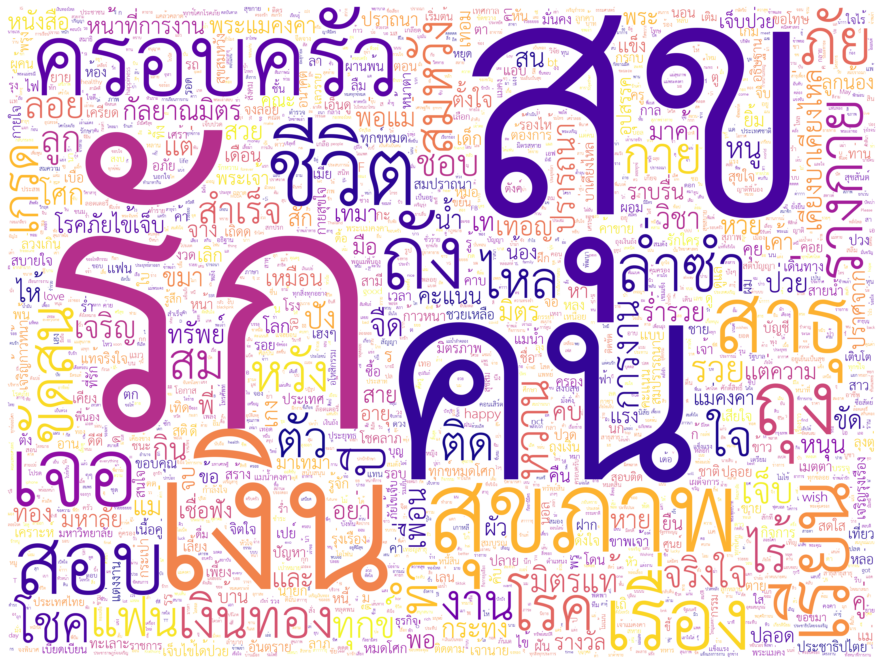

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

In [10]:
words = df.keyword.tolist()

text = []
for c in words:
    text+=c

counted_keyword = dict()

for c in text:
    if c in counted_keyword:
        counted_keyword[c] += 1
    else:
        counted_keyword[c] = 1

df['len_of_keyword'] = df.keyword.apply(lambda x: len(x))
len_of_words = np.array(df['len_of_keyword'].tolist())        

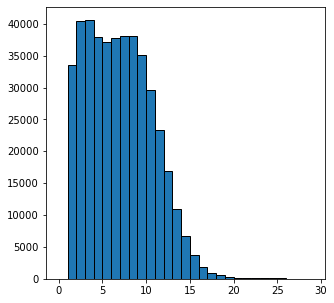

In [11]:
import matplotlib.pyplot as plt

 # arguments are passed to np.histogram
fig, ax = plt.subplots(figsize=(5,5) )
ax.hist(len_of_words, bins=range(30), ec="k")
ax.locator_params(axis='x', integer=True)
plt.show()

In [12]:
def getTop3(L):
    if len(L)<3:
        return np.nan
    return sorted(L, key=lambda item: -counted_keyword[item])[0:3]
df['top3'] = df.keyword.apply(lambda x: getTop3(x))

In [106]:
df = df.dropna()
print(len(df))
df.head(3)

360805


,id,name,content,date,cut_content,postag_content,keyword,len_of_keyword,top3,vec
0,9070017,สวยที่สุดในสามโลก,คลั่งรักแฟนตัวเองมากค่ะร๊ากนะ\n อยู่เป็นเมียข่...,2021-01-25 09:41:28,คลั่งรัก แฟน ตัว เอง มาก ค่ะ ร๊าก นะ\n อยู่ ...,"[(คลั่งรัก, VERB), (แฟน, VERB), (ตัว, NOUN), (...","[ตัว, เมีย, คลั่งรัก, แฟน, ข่อย]",5,"[ตัว, แฟน, เมีย]","[0.13184032837549844, -0.06934999922911327, 0...."
1,9070001,แม่หนึ่ง,ขอให้แม่สุขภาพแข็งและรํ่ารวยเงินทอง,2021-01-25 08:31:28,ขอ ให้ แม่ สุขภาพ แข็ง และ รํ่า รวย เงินทอง,"[(ขอ, VERB), (ให้, VERB), (แม่, NOUN), (สุขภาพ...","[แม่, สุขภาพ, รํ่า, รวย, เงินทอง]",5,"[สุขภาพ, เงินทอง, รวย]","[0.03567966570456823, 0.07496966421604156, 0.0..."
2,9069993,เบบี๋,ขอให้ข้าพเจ้าคะแนนดีๆมีแต่สิ่งดีๆเข้ามาในชีวิต...,2021-01-25 08:13:10,ขอ ให้ ข้าพเจ้า คะแนน ดี ๆ มี แต่ สิ่ง ดี ๆ เข...,"[(ขอ, VERB), (ให้, VERB), (ข้าพเจ้า, NOUN), (ค...","[คะแนน, ชีวิต, แฟน]",3,"[ชีวิต, แฟน, คะแนน]","[-0.03599533438682556, -0.027704333265622456, ..."


# Keyword2Vector

In [14]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from pythainlp.tokenize import word_tokenize
from gensim.models import KeyedVectors
import numpy as np

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import dill as pickle
import pandas as pd

from pythainlp import word_vector
model = word_vector.get_model()

In [15]:
thai2dict = {}
for word in model.index2word:
    thai2dict[word] = model[word]
thai2vec = pd.DataFrame.from_dict(thai2dict,orient='index')
thai2vec.head(3)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
ที่,0.308956,-0.097699,0.116745,0.215612,0.015768,-0.064163,0.062168,0.039649,0.864940,0.846904,...,-0.142418,0.033241,0.171581,-0.624864,-0.009358,0.449131,0.120130,-0.122195,-0.450617,-0.071318
และ,0.010751,-0.618971,0.129665,0.035460,-0.007560,0.027607,0.397824,0.026543,0.254075,0.168328,...,-0.105786,0.180930,-0.101630,0.070885,-0.037263,0.183606,-0.049088,-0.672288,-1.293044,0.592576
เป็น,-0.015736,-0.258926,0.052953,0.153728,-0.005985,-0.021081,0.041088,0.057312,1.633230,0.442729,...,-0.009408,-0.252576,-0.305512,0.372542,0.049151,0.568470,0.266586,0.400800,-0.784650,0.197369


In [16]:
def top2vec(L):
    count = 0
    vec = np.zeros((900))
    for i,c in enumerate(L):
        if c in thai2dict:
            vec[i*300:(i+1)*300]+=thai2dict[c]
            count+=1
    if count == 0:
        return vec
    return vec/count
        

In [17]:
df['vec'] = df['top3'].apply(lambda x: top2vec(x))

In [18]:
print(len(df.iloc[0].vec))
df.head(3)

900


,id,name,content,date,cut_content,postag_content,keyword,len_of_keyword,top3,vec
0,9070017,สวยที่สุดในสามโลก,คลั่งรักแฟนตัวเองมากค่ะร๊ากนะ\n อยู่เป็นเมียข่...,2021-01-25 09:41:28,คลั่งรัก แฟน ตัว เอง มาก ค่ะ ร๊าก นะ\n อยู่ ...,"[(คลั่งรัก, VERB), (แฟน, VERB), (ตัว, NOUN), (...","[ตัว, เมีย, คลั่งรัก, แฟน, ข่อย]",5,"[ตัว, แฟน, เมีย]","[0.13184032837549844, -0.06934999922911327, 0...."
1,9070001,แม่หนึ่ง,ขอให้แม่สุขภาพแข็งและรํ่ารวยเงินทอง,2021-01-25 08:31:28,ขอ ให้ แม่ สุขภาพ แข็ง และ รํ่า รวย เงินทอง,"[(ขอ, VERB), (ให้, VERB), (แม่, NOUN), (สุขภาพ...","[แม่, สุขภาพ, รํ่า, รวย, เงินทอง]",5,"[สุขภาพ, เงินทอง, รวย]","[0.03567966570456823, 0.07496966421604156, 0.0..."
2,9069993,เบบี๋,ขอให้ข้าพเจ้าคะแนนดีๆมีแต่สิ่งดีๆเข้ามาในชีวิต...,2021-01-25 08:13:10,ขอ ให้ ข้าพเจ้า คะแนน ดี ๆ มี แต่ สิ่ง ดี ๆ เข...,"[(ขอ, VERB), (ให้, VERB), (ข้าพเจ้า, NOUN), (ค...","[คะแนน, ชีวิต, แฟน]",3,"[ชีวิต, แฟน, คะแนน]","[-0.03599533438682556, -0.027704333265622456, ..."


In [19]:
top2vec = df.loc[:,'top3':'vec']

In [20]:
top2vec = top2vec.set_index('top3')


In [21]:
def extractList(L,i):
    return L[i]

In [22]:
for i in range(900):
    top2vec[i] = top2vec['vec'].apply(lambda x: extractList(x,i))

In [23]:
top2vec = top2vec.drop(columns = ['vec'])

In [24]:
top2vec.head(3)

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
top3,,,,,,,,,,,,,,,,,,,,,
"[ตัว, แฟน, เมีย]",0.131840,-0.069350,0.054031,0.391752,0.038749,0.014187,0.068141,-0.031519,0.258050,0.080672,...,0.068646,-0.279048,0.126101,0.025371,-0.010901,-0.083879,-0.011529,-0.028357,-0.125181,0.124025
"[สุขภาพ, เงินทอง, รวย]",0.035680,0.074970,0.033819,-0.087291,-0.096398,-0.074313,0.053700,0.187372,0.031656,-0.065532,...,0.032612,0.013822,-0.010349,0.001805,-0.015230,0.049115,0.040578,-0.012025,-0.019198,-0.033385
"[ชีวิต, แฟน, คะแนน]",-0.035995,-0.027704,0.067251,-0.010689,-0.396124,-0.044600,0.163643,-0.027692,-0.073649,-0.102902,...,0.173241,-0.108100,0.040718,-0.017548,0.015065,0.201410,0.010864,0.127219,0.031555,0.048057


In [25]:
print('x')

x


In [26]:
# top2vec.to_csv('top2vec.csv',index = False )

# PCA

In [29]:
labels = [str(e) for e in list(top2vec.index)]

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(top2vec)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [31]:
principalDf['word'] = labels

In [35]:
principalDf = principalDf.set_index('word')

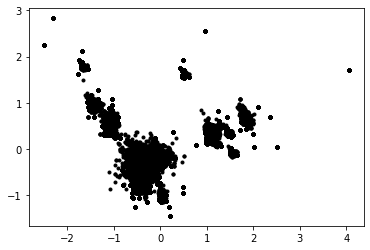

In [36]:
x = principalDf['principal component 1']
y = principalDf['principal component 2']

plt.plot(x, y, '.', color='black');

In [38]:
principalDf.head(3)

,principal component 1,principal component 2
word,,
"['ตัว', 'แฟน', 'เมีย']",-0.374597,-0.305609
"['สุขภาพ', 'เงินทอง', 'รวย']",-0.516390,-0.496972
"['ชีวิต', 'แฟน', 'คะแนน']",-0.334957,-0.354460


# KMean

In [42]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt 

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
X = principalDf
for k in K:
    print(k)
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

1
2
3
4
5
6
7
8
9


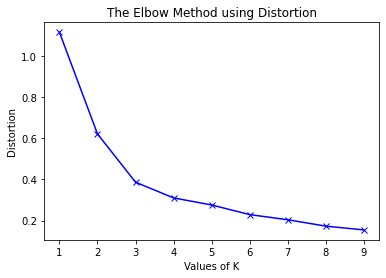

In [43]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [61]:
kmean = KMeans(n_clusters=3).fit_predict(X)  

In [62]:
principalDf['kmean'] = kmean

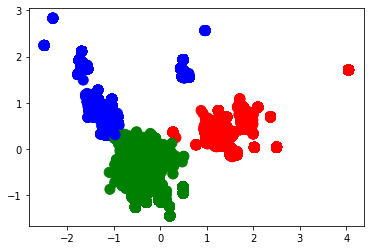

In [101]:
import matplotlib.pyplot as plt
import numpy as np

x = principalDf['principal component 1']
y = principalDf['principal component 2']
categories = principalDf['kmean']

colormap = np.array(['r', 'g', 'b'])

plt.scatter(x, y, s=100, c=colormap[categories])

plt.show()

In [67]:
for i in range(3):
    display(principalDf[principalDf['kmean'] == i ])

,principal component 1,principal component 2,kmean
word,,,
"['รัก', 'สุข', 'พ่อแม่']",1.254238,0.483970,0
"['รัก', 'รัก', 'รวย']",1.442699,0.358929,0
"['รัก', 'เจอ', 'ไห้']",1.043293,0.492100,0
"['รัก', 'คน', 'สาธุ']",1.521784,-0.084355,0
"['รัก', 'คน', 'สวยงาม']",1.533843,-0.096044,0
...,...,...,...
"['รัก', 'ผัว', 'เมีย']",1.119824,0.356218,0
"['รัก', 'หวาน', 'จืดจาง']",1.145159,0.352847,0
"['รัก', 'สุข', 'เงิน']",1.249950,0.833284,0


,principal component 1,principal component 2,kmean
word,,,
"['ตัว', 'แฟน', 'เมีย']",-0.374597,-0.305609,1
"['สุขภาพ', 'เงินทอง', 'รวย']",-0.516390,-0.496972,1
"['ชีวิต', 'แฟน', 'คะแนน']",-0.334957,-0.354460,1
"['สอบ', 'ติด', 'ติดตาม']",-0.526440,-0.311987,1
"['คน', 'น้ำ', 'อาบ']",-0.489075,-0.469169,1
...,...,...,...
"['เรียน', 'ทำ', 'แฟน']",-0.304630,-0.214970,1
"['เงินทอง', 'ไหล', 'ชั้น']",-0.519248,-0.225128,1
"['รวย', 'เก่ง', 'หล่อ']",-0.398015,-0.273329,1


,principal component 1,principal component 2,kmean
word,,,
"['เงิน', 'เงิน', 'ถัง']",-1.748218,1.922686,2
"['คน', 'เงิน', 'ชอบ']",-1.014981,0.679549,2
"['เงิน', 'เจอ', 'ไห้']",-1.139034,0.669127,2
"['เงิน', 'เงิน', 'ถัง']",-1.748218,1.922686,2
"['เงิน', 'เงิน', 'ถัง']",-1.748218,1.922686,2
...,...,...,...
"['เงิน', 'โชค', 'น้ำ']",-1.116640,0.613076,2
"['เงิน', 'เงิน', 'ถัง']",-1.748218,1.922686,2
"['คน', 'เงิน', 'เงินทอง']",-1.039031,0.761828,2


In [88]:
WordClouds = []
for i in range(3):
    words = principalDf[principalDf['kmean'] == i ].index.tolist()
    words = [eval(e) for e in words]
    texts = []
    for e in words:
        texts+=e
    texts = " ".join(texts)
    
    WordClouds.append(WordCloud(font_path='THSarabunNew.ttf', relative_scaling = 0.3,min_font_size=1,background_color="white",width=1024,height=768,max_words=2000, 
                    colormap='plasma', scale=3,font_step=4,collocations=False,regexp=regexp,margin=2
                      ).generate(texts))
    

<ipython-input-92-2ef1afb0eb68>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


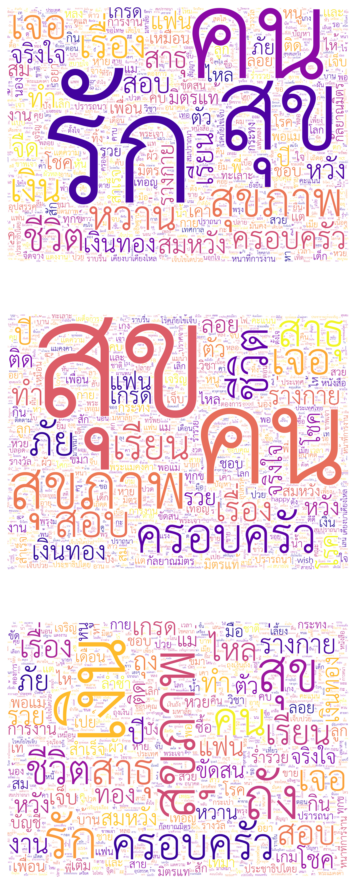

In [92]:
fig, ax = plt.subplots(3,1, figsize=(32, 16))
for i in range(3):
    ax[i].imshow(WordClouds[i], interpolation='bilinear')
    ax[i].axis("off")
fig.show()